# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5 |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
index = np.arange(1, 11, 1).tolist()

In [3]:
student_data = pd.DataFrame({'StudentID': index ,'Age': x_values, 'Tardies': y_values}).set_index("StudentID")
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

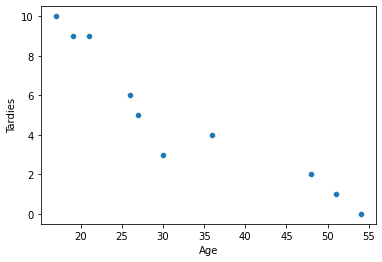

In [4]:
sns.scatterplot(data=student_data,x="Age",y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

**Age and Tardies are negatively correlated**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [6]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


**Both the covariance matrix and the correlation matrix represent the linear relationship between the variables. The correlation is a normalised value and therefore takes values between -1 and 1, while the covariance is not. In any case, both show that `Age` and `Tardies` are two variables that are linearly negatively related.**

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
lr = LinearRegression()

lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [8]:
beta_1

-0.2428207709159808

In [9]:
beta_0

12.888803363135768

In [10]:
print(f"y = {round(beta_0,2)} + {round(beta_1,2)}·x")

y = 12.89 + -0.24·x


In [11]:
student_data["predicted_tardies"] = beta_0 + beta_1 * student_data.Age

**I'm using a linear simple regression model**

In [12]:
student_data

,Age,Tardies,predicted_tardies
StudentID,,,
1,17,10,8.760850
2,51,1,0.504944
3,27,5,6.332643
4,21,9,7.789567
5,36,4,4.147256
6,48,2,1.233406
7,19,9,8.275209
8,26,6,6.575463
9,54,0,-0.223518


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

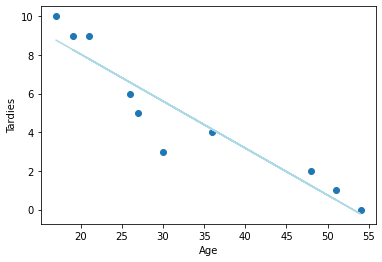

In [13]:
y_hat = beta_0 + beta_1 * student_data.Age
plt.scatter(student_data.Age,student_data.Tardies) 
plt.plot(student_data.Age, y_hat, lw=1.5, color="lightblue") 
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
print("RMSE: " , np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.predicted_tardies)))

RMSE:  1.1540884648655088


In [15]:
#OPTION1

In [16]:
student_data["predicted_tardies_mean"] = student_data.predicted_tardies.mean()

In [17]:
TSS = ((student_data.Tardies - student_data.predicted_tardies_mean) **2 ).sum()
RSS = ((student_data.Tardies - student_data.predicted_tardies)**2).sum()
r2 = ( TSS - RSS ) / ( TSS )
r2

0.8820265558250109

In [18]:
#OPTION2

In [19]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()
results.summary()

/Users/julietastaryfurmanshalom/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        09:18:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As the error is very low and the R^2 is high, the model fits reality very well.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
vehicles_data = pd.read_csv("vehicles.csv")
vehicles_data.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
vehicles_data = vehicles_data.drop(["Engine Displacement", "Transmission","Drivetrain", "Vehicle Class", "Fuel Type", "City MPG", "Highway MPG", "Make"   ],axis=1)

In [22]:
vehicles_data.rename(columns={"Fuel Barrels/Year":"Fuel_Barrels_Year", "Combined MPG" : "Combined_MPG", "CO2 Emission Grams/Mile" : "CO2_Emission_Grams_Mile", "Fuel Cost/Year" : "Fuel_Cost_Year"  }, inplace=True)

In [23]:
vehicles_data.head(3)

,Model,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,DJ Po Vehicle 2WD,1984,4.0,19.388824,17,522.764706,1950
1,FJ8c Post Office,1984,6.0,25.354615,13,683.615385,2550
2,Post Office DJ5 2WD,1985,4.0,20.600625,16,555.437500,2100


In [24]:
vehicles_data.corr()

,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel_Barrels_Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2_Emission_Grams_Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel_Cost_Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


**The most important variable in determing C02 emissions will be `Fuel Barrels/Year` and the least helpful will be the `Year`**

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [25]:
lr.fit(
    X = vehicles_data[["Year","Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year"]],
    y = vehicles_data["CO2_Emission_Grams_Mile"]
)

beta_1 = lr.coef_[0]
beta_2 = lr.coef_[1]
beta_3 = lr.coef_[2]
beta_4 = lr.coef_[3]
beta_5 = lr.coef_[4]
beta_0 = lr.intercept_

In [26]:
print(f"y = {round(beta_0,2)} {round(beta_1,2)}·x1 + {round(beta_2,2)}·x2 + {round(beta_3,2)}·x3 {round(beta_4,2)}·x4 + {round(beta_5,2)}·x5")

y = 769.89 -0.32·x1 + 1.88·x2 + 19.05·x3 -3.04·x4 + 0.03·x5


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [27]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=vehicles_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                             09:18:44   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
dict_ = {}
dict_["Year"] =  smf.ols("CO2_Emission_Grams_Mile ~ Year", data=vehicles_data).fit().rsquared
dict_["Cylinders"] = smf.ols("CO2_Emission_Grams_Mile ~ Cylinders", data=vehicles_data).fit().rsquared
dict_["Fuel_Barrels_Year"] = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year", data=vehicles_data).fit().rsquared
dict_["Combined_MPG"] =  smf.ols("CO2_Emission_Grams_Mile ~ Combined_MPG", data=vehicles_data).fit().rsquared
dict_["Fuel_Cost_Year"] = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Cost_Year", data=vehicles_data).fit().rsquared
print(max(dict_.values()))
print(min(dict_.values()))
dict_

0.9725680773391495
0.04941711347196842


{'Year': 0.04941711347196842,
 'Cylinders': 0.566094554907973,
 'Fuel_Barrels_Year': 0.9725680773391495,
 'Combined_MPG': 0.8579002325639428,
 'Fuel_Cost_Year': 0.8665099297561762}

- **The model fits reality very well - R^2 = 0.981** 
- **All variables are significant**
- **The most influential variable is `Fuel_Barrels_Year` (R2 = 0.97)  and the least `Year` (R2 = 0.049).**

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
df = pd.DataFrame({'X': X ,'Y': Y})
df

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
lr.fit(
    X = df[["X"]],
    y = df.Y
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [ ]:
print(f" Y = {round(beta_0,2)}  {round(beta_1,2)}·X ")

In [ ]:
sns.regplot(x="X", y="Y", data=df)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

**There's a strong correlation between X and Y**

In [ ]:
df.corr()

In [ ]:
results = smf.ols("Y ~ X", data=df).fit()
results.summary()

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
df["predict_Y"] = beta_1 * df.X + beta_0
df["error"] = (df["predict_Y"] - df["Y"]).abs()
df

Those rows with an error greater than 1 are deleted. 

In [ ]:
df_new = df[df["error"] < 1]
df_new

In [ ]:
sns.regplot(x="X", y="Y", data=df_new)

In [ ]:
df_new.corr()

In [ ]:
results = smf.ols("Y ~ X", data=df_new).fit()
results.summary()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

**With the new model, the correlation between the variables is higher, as well as the R2**